In [2]:
#libraries
library(ggplot2)
library(dplyr) 
library(tidyverse)
library(stringr)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  3.0.4     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
#load ratings dataset
ratings = read.delim("./../dataset/filtered_title_ratings.tsv",header=TRUE)

In [4]:
head(ratings)

tconst,averageRating,numVotes
tt0000001,5.6,1654
tt0000002,6.1,199
tt0000003,6.5,1366
tt0000004,6.2,121
tt0000005,6.2,2149
tt0000006,5.3,115


In [5]:
summary(ratings)

       tconst       averageRating       numVotes      
 tt0000001:     1   Min.   : 1.000   Min.   :      5  
 tt0000002:     1   1st Qu.: 5.600   1st Qu.:     10  
 tt0000003:     1   Median : 6.500   Median :     26  
 tt0000004:     1   Mean   : 6.378   Mean   :   2028  
 tt0000005:     1   3rd Qu.: 7.300   3rd Qu.:    127  
 tt0000006:     1   Max.   :10.000   Max.   :2296829  
 (Other)  :423177                                     

In [8]:
g = ggplot(ratings,aes(x=numVotes,y=averageRating,colour=factor(averageRating)))+
geom_point(alpha=0.1,show.legend=FALSE)+
geom_vline(xintercept=1000,colour="red")+
theme_classic(base_size = 19)+
labs(y=expression("Average Rating"),x=expression("Number of Votes"))+
scale_x_log10(breaks=c(10,100,1000,10000,100000,1000000,10000000))+
scale_y_continuous(breaks=seq(0,10,1))

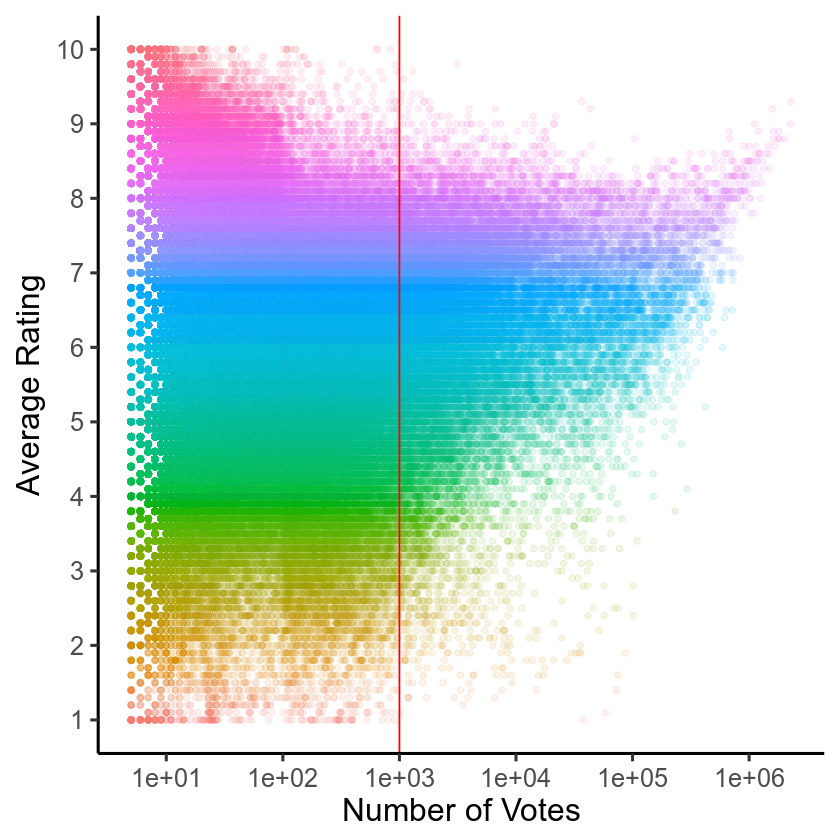

In [9]:
g

In [ ]:
ggsave(plot=g,file="threshold_numvotes.png",width=10,height=10,dpi=300)

In [ ]:
ratings_above1000=subset(ratings,numVotes>1000)
head(ratings_above1000)

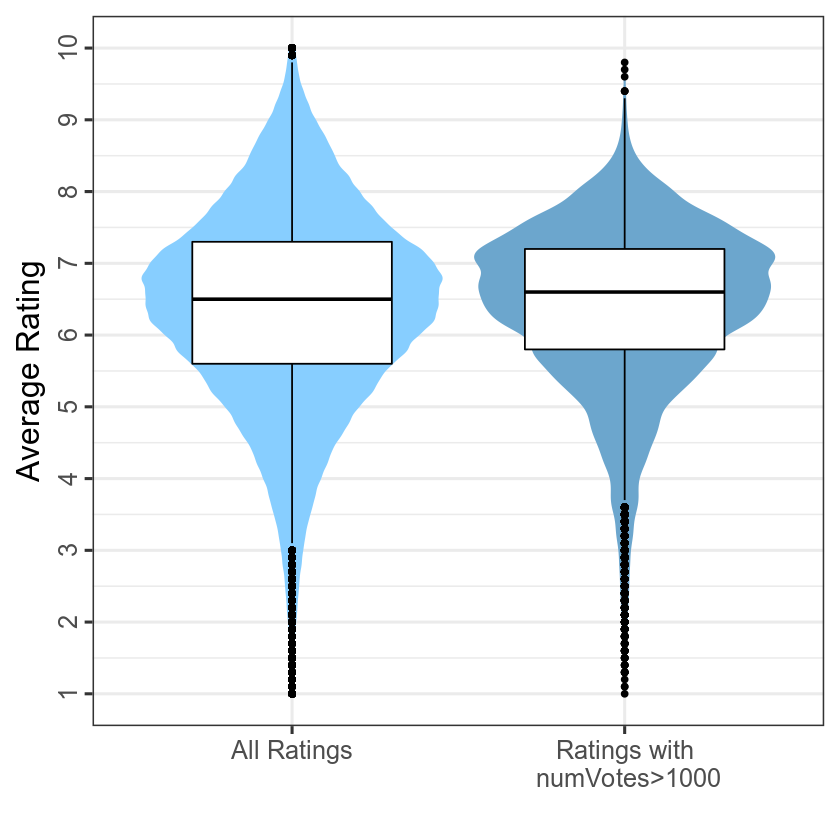

In [35]:
g = ggplot()+
geom_violin(data=ratings, aes(x="0",y=averageRating),fill="skyblue1",color="skyblue1")+
geom_boxplot(data=ratings, aes(x="0",y=averageRating),width=0.6,fill="white",color="black")+
geom_violin(data=ratings_above1000, aes(x="1",y=averageRating),fill="skyblue3",color="skyblue3")+
geom_boxplot(data=ratings_above1000, aes(x="1",y=averageRating),width=0.6,fill="white",color="black")+
scale_x_discrete(labels=c("1"="Ratings with\n numVotes>1000","0"="All Ratings"))+
scale_y_continuous(breaks=seq(0,10,1))+
labs(y=expression("Average Rating"),x="")+
theme_bw(base_size = 19)+
theme(axis.text.y = element_text(angle = 90, vjust = 0.5, hjust=0.5))


In [ ]:
ggsave(plot=g,file="threshold_numvotes.png",width=10,height=10,dpi=300)